<a href="https://colab.research.google.com/github/VinhTruong1120/fashion-mnist-prediction.ipynb/blob/main/Fashion_MNIST_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Fashion MNIST
*   **Fashion-MNIST data**: is a dataset of Zalando's article image -
consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a drop-in replacement for original MNIST dataset for benchmarking machine learning algorithms. It share the same size and structure of training and testing splits.
*   **Goal**: classify greyscale Fashion-MNIST images into 10 classes

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(f"Tensorflow: {tf.__version__}")


Tensorflow: 2.15.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# 1. Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_nums = len(class_names)
print(class_nums)

10


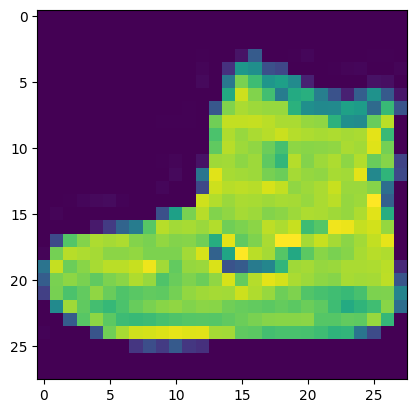

In [ ]:
plt.imshow(X_train[0])

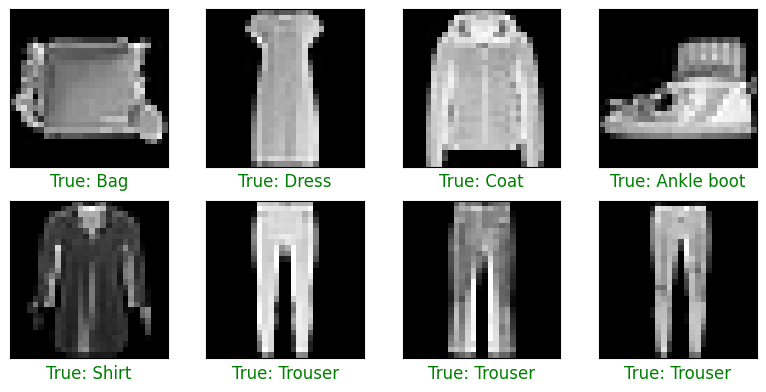

In [ ]:
from typing import Optional
def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

  len_x = x_data.shape[0]
  for idx in range(nrows * ncols):
      ax = axes[idx // ncols, idx % ncols]

      img_idx = random.randint(0, len_x)

      ax.imshow(x_data[img_idx], cmap="gray")
      ax.set(xticks=[], yticks=[])
      color ='green'
      true_label_str = f"True: {class_names[y_data[img_idx]]}"

      if y_proba is not None:
        predicted_idx = np.argmax(y_proba[img_idx])
        predicted_label = class_names[predicted_idx]
        color = 'red' if predicted_idx != y_data[img_idx] else color
        predicted_label_str = f"\nPrediected: {predicted_label}"

      img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
      ax.set_xlabel(img_title, color = color, fontsize=12)
  plt.tight_layout()
  plt.show()

plot_data(X_test, y_test)

# 2. Image Pre-processing


*   Reshaping it into the shape the model expects and scaling it so that all values are in the `[0, 1]` interval.
*   Transform from `unit8` it into `float32`



In [ ]:
# Convert to float32 & Scale images to the [0, 1] range for training
X_train = X_train.astype(np.float32) /255
X_test = X_test.astype(np.float32) /255


In [ ]:
X_test.shape, X_test.dtype

((10000, 28, 28), dtype('float32'))

In [ ]:
# Make sure images gave shape (60000, 28, 28) => (60000, 28, 28, 1)

X_train = np.expand_dims(X_train, axis=-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
#   Convert class vectors to binary class matrices: 1 => [0 1 0 0 ....]
#   1               => sparse_categorical_crossentropy
#   [0 1 0 0 ....]  => categorical_crossentropy
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [ ]:
y_train[0] , y_train_label[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

# 3. Network (ANN) Architecture

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
from keras.api._v2.keras import activations
model = keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
epochs = 10
batch_size = 256
history = model.fit(X_train, y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1)

Epoch 1/10
211/211 [==============================] - 6s 22ms/step - loss: 0.1489 - accuracy: 0.9432 - val_loss: 0.4400 - val_accuracy: 0.8915
Epoch 2/10
211/211 [==============================] - 4s 21ms/step - loss: 0.1426 - accuracy: 0.9456 - val_loss: 0.4104 - val_accuracy: 0.8935
Epoch 3/10
211/211 [==============================] - 6s 29ms/step - loss: 0.1368 - accuracy: 0.9482 - val_loss: 0.4371 - val_accuracy: 0.8940
Epoch 4/10
211/211 [==============================] - 4s 21ms/step - loss: 0.1311 - accuracy: 0.9498 - val_loss: 0.4322 - val_accuracy: 0.8975
Epoch 5/10
211/211 [==============================] - 5s 23ms/step - loss: 0.1274 - accuracy: 0.9519 - val_loss: 0.4441 - val_accuracy: 0.8917
Epoch 6/10
211/211 [==============================] - 6s 29ms/step - loss: 0.1246 - accuracy: 0.9510 - val_loss: 0.4264 - val_accuracy: 0.8872
Epoch 7/10
211/211 [==============================] - 5s 23ms/step - loss: 0.1218 - accuracy: 0.9529 - val_loss: 0.5084 - val_accuracy: 0.8838

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

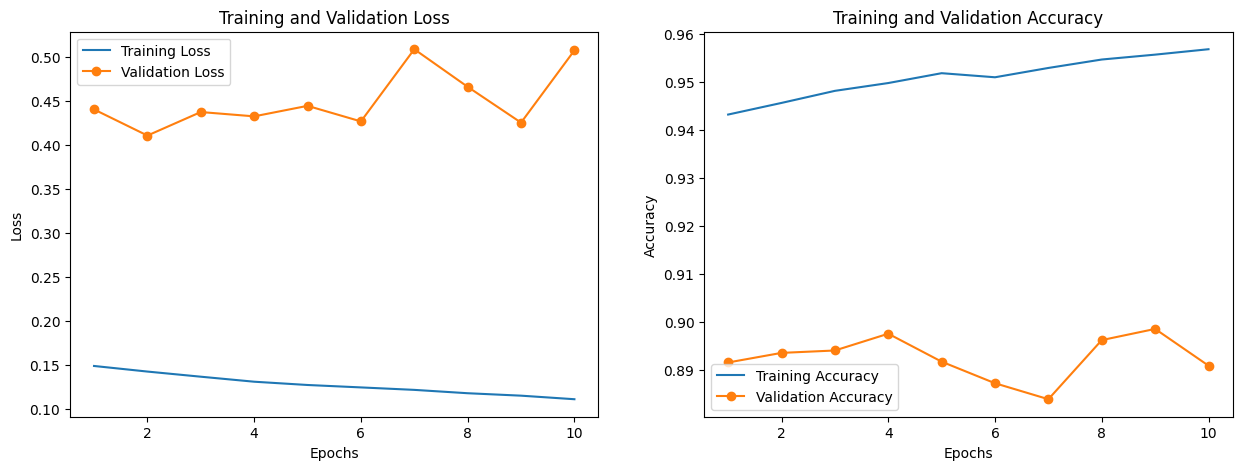

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label = 'Training Loss')
ax1.plot(epoch_runs, val_loss, label = 'Validation Loss', marker='o')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set(title = 'Training and Validation Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = 'Training Accuracy')
ax2.plot(epoch_runs, val_acc, label = 'Validation Accuracy', marker='o')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set(title = 'Training and Validation Accuracy')
ax2.legend()
plt.show()

# 4. Model Evaluation

In [ ]:
score = model.evaluate(X_test, y_test_label)

313/313 [==============================] - 4s 11ms/step - loss: 0.5015 - accuracy: 0.8941


In [ ]:
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1]:.4f}")

Test loss: 0.5015
Test accuracy: 0.8941


# 5. Prediction

In [ ]:
X_sample = X_test[:3]
y_proba = model.predict(X_sample)

1/1 [==============================] - 0s 200ms/step


In [ ]:
y_proba.round()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predictions = np.argmax(y_proba, axis=1)

In [ ]:
[class_names[pred] for pred in predictions]

['Ankle boot', 'Pullover', 'Trouser']

In [ ]:
y_proba = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [ ]:
y_proba.shape

(10000, 10)

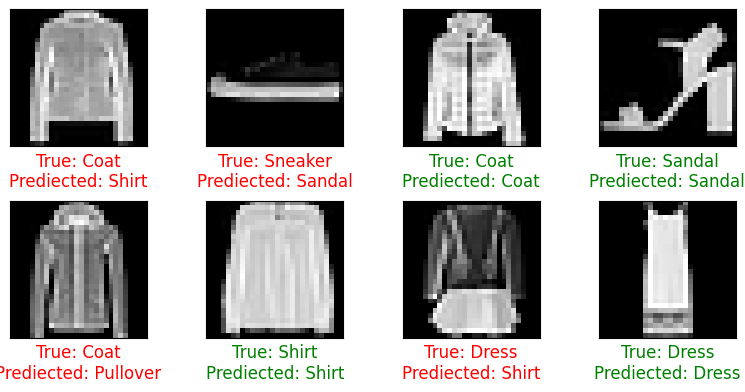

In [ ]:
plot_data(X_test, y_test, y_proba)